In [1]:
# Dependencies
import pandas as pd
import requests
import json
import os
import csv
import prettyprint as pp
import matplotlib.pyplot as plt
# from apiclient import errors

# Google developer API key
from api_keys import gkey

In [2]:
world_happiness = "Selected_cities_2020.csv"
location_types = "Location_Types.csv"
world_happiness_df = pd.read_csv(world_happiness, encoding="UTF-8")
location_types_df = pd.read_csv(location_types, encoding="UTF-8")
 # base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [3]:
entertainment_location_types = location_types_df.loc[location_types_df["sub_type"]
                                               =="Entertainment",:]
entertainment_types_list = []
entertainment_location_types.reset_index(inplace=True)
for i in range(len(entertainment_location_types)):
    entertainment_types_list.append(entertainment_location_types.loc[i,"location_types"])

entertainment_types_list

['amusement_park',
 'aquarium',
 'art_gallery',
 'movie_theater',
 'night_club',
 'stadium',
 'tourist_attraction',
 'zoo']

In [4]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
coord=[]
cities=["Helsinki","Oslo","Ottawa","Washington D.C","Rome","Tokyo","City of Victoria","Beijing","Dhaka"",New Delhi","Gaborone","Kabul"]
for city in cities:
    params = {"address": city, "key":gkey}
    response = requests.get(base_url, params=params)
    places_data = response.json()   
    lat=places_data["results"][0]["geometry"]["location"]["lat"]
    long=places_data["results"][0]["geometry"]["location"]["lng"]
    coord.append(f"{lat},{long}")
coord

['60.16985569999999,24.9383791',
 '59.9138688,10.7522454',
 '45.4215296,-75.69719309999999',
 '38.9071923,-77.0368707',
 '41.9027835,12.4963655',
 '35.6803997,139.7690174',
 '44.8608086,-93.660106',
 '39.90419989999999,116.4073963',
 '28.6461322,77.1964488',
 '-24.6282079,25.9231471',
 '34.5553494,69.207486']

In [5]:
#Use for loop to calculate amusement parks
place_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
target_type ="amusement park"
count_amusmt_pk=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_amusmt_pk.append(len(places_data["results"]))
   
count_amusmt_pk

[0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0]

In [6]:
#Use for loop to calculate aquariums

target_type ="aquarium"
count_aquariums=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_aquariums.append(len(places_data["results"]))

count_aquariums


[2, 4, 2, 0, 1, 2, 0, 2, 1, 0, 0]

In [7]:
entertainment_types_list

['amusement_park',
 'aquarium',
 'art_gallery',
 'movie_theater',
 'night_club',
 'stadium',
 'tourist_attraction',
 'zoo']

In [8]:
#Use for loop to calculate art galleries
target_type ="art gallery"
count_art_galleries=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_art_galleries.append(len(places_data["results"]))

count_art_galleries


[20, 20, 18, 20, 20, 20, 2, 1, 8, 2, 0]

In [9]:
#Use for loop to calculate movie theaters
target_type ="movie theater"
count_movie_theaters=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_movie_theaters.append(len(places_data["results"]))

count_movie_theaters

[12, 6, 7, 2, 20, 16, 1, 12, 4, 0, 1]

In [10]:
#Use for loop to calculate night clubs
target_type ="night club"
count_clubs=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_clubs.append(len(places_data["results"]))

count_clubs

[20, 20, 20, 20, 20, 4, 0, 15, 8, 2, 1]

In [11]:
#Use for loop to calculate tourist attractions
target_type ="stadium"
count_stadiums=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_stadiums.append(len(places_data["results"]))

    
count_stadiums

[5, 6, 3, 1, 0, 0, 0, 5, 0, 1, 0]

In [12]:
#Use for loop to calculate tourist attractions
target_type ="tourist attraction"
count_tourist_attractions=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_tourist_attractions.append(len(places_data["results"]))

    
count_tourist_attractions

[20, 13, 20, 11, 20, 20, 0, 20, 2, 2, 0]

In [13]:
#Use for loop to calculate zoos
target_type ="zoo"
count_zoos=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_zoos.append(len(places_data["results"]))

    
count_zoos

[3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [14]:
entertainment_dict = {"Cities":cities,"Stadiums":count_stadiums, "Movie Theathers":count_movie_theaters,"Night Clubs":count_clubs,"Art Galleries":count_art_galleries, 
                      "Tourist Attractions": count_tourist_attractions, "Zoos":count_zoos,"Aquariums":count_aquariums, "Amusement Parks":count_amusmt_pk}
             

entertainment_data_df = pd.DataFrame(entertainment_dict)
entertainment_data_df

,Cities,Stadiums,Movie Theathers,Night Clubs,Art Galleries,Tourist Attractions,Zoos,Aquariums,Amusement Parks
0,Helsinki,5,12,20,20,20,3,2,0
1,Oslo,6,6,20,20,13,2,4,2
2,Ottawa,3,7,20,18,20,0,2,1
3,Washington D.C,1,2,20,20,11,0,0,0
4,Rome,0,20,20,20,20,0,1,1
5,Tokyo,0,16,4,20,20,0,2,0
6,City of Victoria,0,1,0,2,0,0,0,0
7,Beijing,5,12,15,1,20,1,2,0
8,"Dhaka,New Delhi",0,4,8,8,2,0,1,0
9,Gaborone,1,0,2,2,2,0,0,0


In [15]:
#sum the totals of each row
sum_rows= entertainment_data_df.sum(axis=1)


In [16]:
#Add to dataframe
entertainment_data_df["Total"]=sum_rows
entertainment_data_df

,Cities,Stadiums,Movie Theathers,Night Clubs,Art Galleries,Tourist Attractions,Zoos,Aquariums,Amusement Parks,Total
0,Helsinki,5,12,20,20,20,3,2,0,82
1,Oslo,6,6,20,20,13,2,4,2,73
2,Ottawa,3,7,20,18,20,0,2,1,71
3,Washington D.C,1,2,20,20,11,0,0,0,54
4,Rome,0,20,20,20,20,0,1,1,82
5,Tokyo,0,16,4,20,20,0,2,0,62
6,City of Victoria,0,1,0,2,0,0,0,0,3
7,Beijing,5,12,15,1,20,1,2,0,56
8,"Dhaka,New Delhi",0,4,8,8,2,0,1,0,23
9,Gaborone,1,0,2,2,2,0,0,0,7


Text(0, 0.5, 'Score')

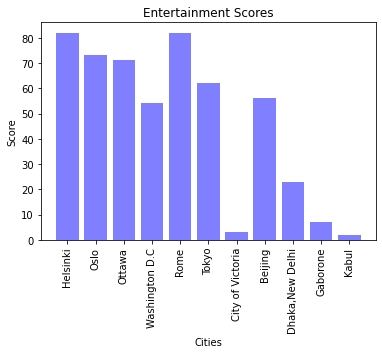

In [17]:
entertainment_score = entertainment_data_df["Total"]

x_cities = entertainment_data_df["Cities"]
plt.bar(x_cities,entertainment_score,color="b",alpha=0.5,align="center")
plt.xticks(rotation=90)
plt.title("Entertainment Scores")
plt.xlabel("Cities")
plt.ylabel("Score")